# Expermientation Notebook

Purpose: Allow us to mess around with the data without interfering or overloading the main files/folder.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
bookings_train_df = pd.read_csv(filepath_or_buffer='../data/S3E7/train.csv')

bookings_train_df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [5]:
# Copied from common/data_cleaner.py

# Renaming columns to be more readable
# Current unknowns: market_segment_type, 
bookings_train_df.columns = ["id", 'num_adults', 'num_children', 'num_weekend_nights', 'num_week_nights', 'meal_plan', 
              'parking', 'room_type', 'lead_time', 'year', 'month', 'date', 'market_segment_type', 'repeated_customer',
              'num_prev_cancellations', 'num_prev_not_cancelled', 'avg_price_per_room', 'num_special_requests',
              'booking_status']

In [6]:
bookings_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      42100 non-null  int64  
 1   num_adults              42100 non-null  int64  
 2   num_children            42100 non-null  int64  
 3   num_weekend_nights      42100 non-null  int64  
 4   num_week_nights         42100 non-null  int64  
 5   meal_plan               42100 non-null  int64  
 6   parking                 42100 non-null  int64  
 7   room_type               42100 non-null  int64  
 8   lead_time               42100 non-null  int64  
 9   year                    42100 non-null  int64  
 10  month                   42100 non-null  int64  
 11  date                    42100 non-null  int64  
 12  market_segment_type     42100 non-null  int64  
 13  repeated_customer       42100 non-null  int64  
 14  num_prev_cancellations  42100 non-null

In [10]:
bookings_train_df.describe()

,id,num_adults,num_children,num_weekend_nights,num_week_nights,meal_plan,parking,room_type,lead_time,year,month,date,market_segment_type,repeated_customer,num_prev_cancellations,num_prev_not_cancelled,avg_price_per_room,num_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [8]:
bookings_train_df.head()

,id,num_adults,num_children,num_weekend_nights,num_week_nights,meal_plan,parking,room_type,lead_time,year,month,date,market_segment_type,repeated_customer,num_prev_cancellations,num_prev_not_cancelled,avg_price_per_room,num_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


### Data Feature Types

#### Nominals
- meal_plan - represents what type of meal plan the reservation bought
- room_type - represents what type of room the reservation is for
- parking - binary feature, represents if the reservation included parking or not
- repeated_customer - binary feature, represents if the customer is a return customer or not
- booking_status - binary feature, represents if the reservation was cancelled or not

#### Ordinals
- id - represents the booking/reservation id (could drop)
- month - represents the month the reservation starts
- date - represents the day of the month the reservation starts

#### Discrete
- num_adults - represents the number of adults in the reservation
- num_children - represents the number of children in the reservation
- num_weekend_nights - represents the number of weekend nights the reservation spans for
- num_week_nights - represents the number of weekday?? nights the reservation spans for
- num_prev_cancellations - represents the number of previous reservations customer had canceled
- num_prev_not_cancelled - represents the number of previous reservations the customer did not cancel

#### Continuous
- year - represents the year the reservation starts
- avg_price_per_room - represents the average price of the room, most likely dependent on room_type
- num_special_requests - represents the number of special requests made by customer

#### Unknown Data Type
- lead_time
- market_segment_type

## Exploratory Data Analysis

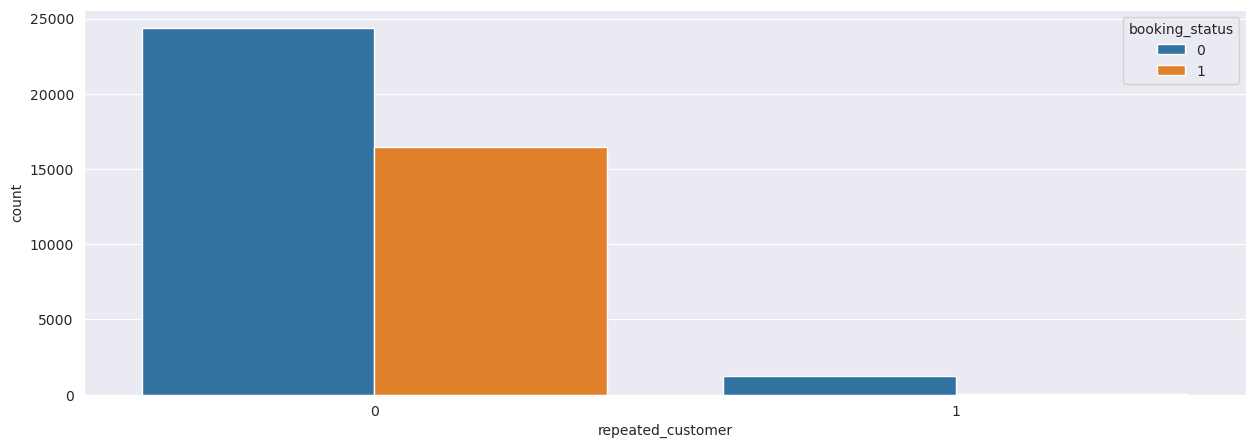

In [21]:
sns.countplot(x='repeated_customer', hue='booking_status', data=bookings_train_df)
plt.show()

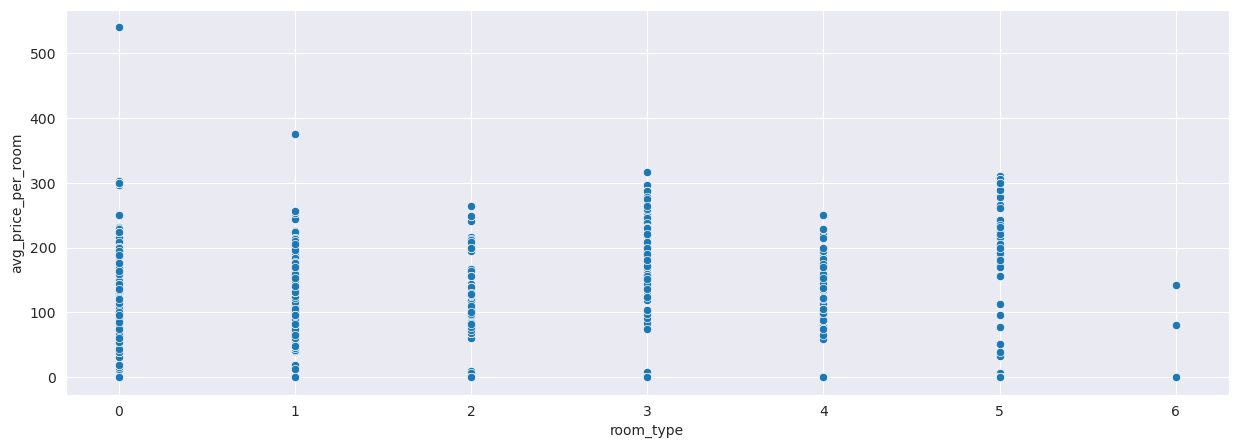

room_type
0     94.309912
1    126.280997
2     88.779496
3    183.510881
4    127.886656
5    119.756789
6     50.535000
Name: avg_price_per_room, dtype: float64

In [22]:
sns.scatterplot(x='room_type', y='avg_price_per_room', data=bookings_train_df)
plt.show()

# Getting the average price per room type
bookings_train_df.groupby('room_type')['avg_price_per_room'].mean()

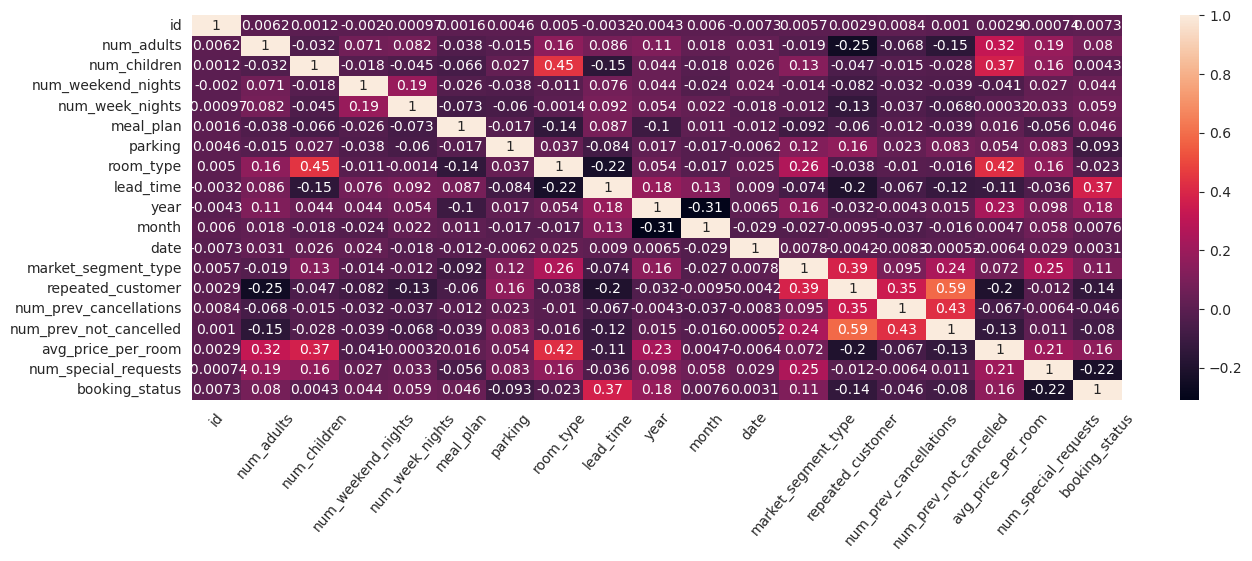

In [ ]:
sns.heatmap(bookings_train_df.corr(), annot=True)

plt.xticks(rotation = 50)
plt.show()

### Correlations:
- Seems that lead_time and booking_status have a relationship
- Seems that market_segment_type and num_prev_not_cancelled have a relationship
- Confirmed that room_type and avg_price_per_room have a relationship

### Data Pre-Processing

In [35]:
bookings_train_df[bookings_train_df.isna().any(axis=1)]

,id,num_adults,num_children,num_weekend_nights,num_week_nights,meal_plan,parking,room_type,lead_time,year,month,date,market_segment_type,repeated_customer,num_prev_cancellations,num_prev_not_cancelled,avg_price_per_room,num_special_requests,booking_status
